In [1]:
from tensorflow import keras
from keras.datasets import boston_housing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.metrics import r2_score
import numpy as np

  # 1. **Read Data**

In [2]:
(X, Y), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [4]:
pd.DataFrame(Y)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


# 2. **Data Shape**

In [5]:
X.shape

(404, 13)

In [6]:
Y.shape

(404,)

# 3. **Data Preprocessing**

In [7]:
x_CrossValidation,x_train, y_CrossValidation,  y_train,  = train_test_split(X, Y, test_size=0.75, random_state=1)

In [8]:
x_train.shape

(303, 13)

In [9]:
x_CrossValidation.shape

(101, 13)

# 4. **Build,Train Model**

In [10]:
# Initialize lists containing the lists, models, and scalers
train_mses = []                  # array for train mean square error
crossValidation_mses = []        # array for crossValidation mean square error
models = []                      # array for models 
scalers = []                     # array for normalization

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.   y=ax+b   x--> x power 10 
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()    # z nomalization   (x - mean)/ standardDeviation
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()              
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    ypredict = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, ypredict) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_crossValidation_mapped = poly.fit_transform(x_CrossValidation)
    X_crossValidation_mapped_scaled = scaler_poly.transform(X_crossValidation_mapped)
    
    # Compute the cross validation MSE
    crossval_yPred = model.predict(X_crossValidation_mapped_scaled)
    crossValidation_mse = mean_squared_error(y_CrossValidation, crossval_yPred) / 2
    crossValidation_mses.append(crossValidation_mse)

# 5. **Visulaizing training mean square error models result**

In [11]:
train_mses

[10.828457417154716,
 2.448273543591239,
 1.2180837022643525e-24,
 4.4132082646459025e-26,
 1.718331320145128e-26,
 1.2700677496816983e-26,
 1.8621544617240065e-26,
 2.3025148435277367e-26,
 5.251638273229505e-26,
 8.554823825905429e-26]

# 6. **Visulaizing crossValidation mean square error models result**

In [12]:
crossValidation_mses

[12.080071416116233,
 8.867365808883903,
 2902.906332742497,
 677.4995655240484,
 315.45205694274705,
 221.0996972506774,
 201.708460862,
 209.32949598921385,
 233.21230711275535,
 272.0824402949149]

# 7. **Ploting crossValidation mse**

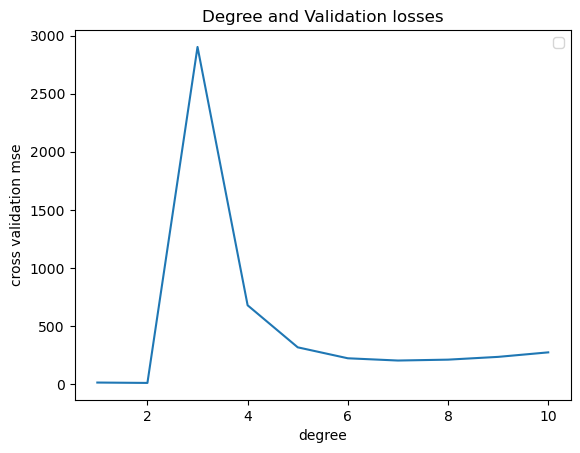

In [13]:
degrees=range(1,11)
plt.xlabel("degree")
plt.ylabel("cross validation mse")
plt.legend(['Degree', 'Validation'])
plt.title('Degree and Validation losses')
plt.plot(degrees,crossValidation_mses)

# 8. **Get minimum value of training loses**

In [14]:
np.min(train_mses)

1.2700677496816983e-26

# 9. **Get minimum value of validation loses**

In [15]:
np.min(crossValidation_mses)

8.867365808883903

# 10.**Back the degree of model that has the least validation loss**

In [16]:
degree = np.argmin(crossValidation_mses) + 1
degree

2

# 10. **Test at model that has the least validation loss**

In [17]:
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {crossValidation_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 2.45
Cross Validation MSE: 8.87
Test MSE: 5.77


# 11. **Evaluate Model**

In [18]:
print(r2_score(y_test,yhat)*100)

86.13557736967216
